<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


In [317]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [318]:
# Указываем параметры
Z = 1  # Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

M = 100  # Число наблюдений
data = []
for i in range(N):

    ngood = np.random.randint(70, 100)
    nbad = 100 - ngood
    nsample = np.random.randint(1, 100)

    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P))
    # ngood - количество "хороших" элементов в выборке
    # nbad - количество "плохих" элементов в выборке
    # nsample - общий размер выборки
    # size - форма матрицы данных

    data.append(c)

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y

xy = [[x[i], y[i]] for i in range(len(x))]

# Создаем список Y, присваивая каждому классу уникальное значение
# Y будет представлять классификационный признак,
# который указывает на принадлежность каждой точки данных к одному из 5 классов.
Y = []
for i in range(N):
    Y.extend([i] * M)

# Преобразуем список Y в массив numpy
Y = np.array(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

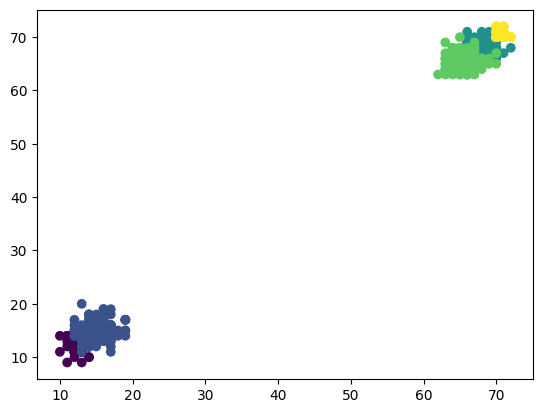

In [319]:
# Создаем DataFrame
res_df = pd.DataFrame(xy)
# Создаем двумерный рассеянный график
plt.scatter(x, y, c=Y)
# Показываем график
plt.show()

In [320]:
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standart_df = pd.DataFrame(sc.fit_transform(res_df))
standart_df.describe()

,0,1
count,500.000000,5.000000e+02
mean,0.000000,-1.136868e-16
std,1.001002,1.001002e+00
min,-1.372133,-1.409163e+00
25%,-1.221308,-1.220964e+00
50%,0.701715,6.986722e-01
75%,0.852540,8.492318e-01
max,0.965659,9.621516e-01


In [321]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)

# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [322]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0 -1.154009 -1.146160
1  0.792210  0.794278
2  0.901498  0.895068
3  0.698242  0.706101
4 -1.263689 -1.268869
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0   0   0 100]
 [ 80   0   0   0  20]
 [  0  73  24   3   0]
 [  0  27   0  73   0]
 [  0   0 100   0   0]]


0   -1.154009
1    0.792210
2    0.901498
3    0.698242
4   -1.263689
Name: 0, dtype: float64


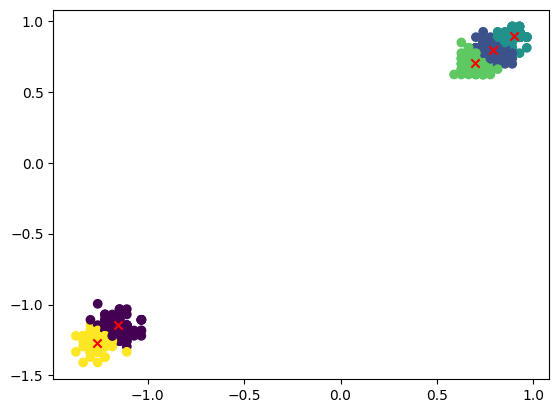

In [323]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
# Создаем двумерный рассеянный график
plt.scatter(standart_df[0], standart_df[1], c=kmeans.labels_)

# Добавляем точки для центров кластеров (df_cluster_centers)
plt.scatter(df_cluster_centers[0], df_cluster_centers[1], c='red', marker='x')

print(df_cluster_centers[0])
# Показываем график
plt.show()

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.5, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

In [325]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
assert len(X_train) + len(X_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)
assert len(y_train) + len(y_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
# Вывести первые несколько объектов данных (первые 5, например)
print("Первые 5 объектов X_train:")
print(X_train[:5])

print("Первые 5 объектов y_train:")
print(y_train[:5])

print("Первые 5 объектов X_test:")
print(X_test[:5])

print("Первые 5 объектов y_test:")
print(y_test[:5])

Форма X_train: (250, 2)
Форма X_test: (250, 2)
----------------------------------------------------------------------------------
Форма y_train: (250,)
Форма y_test: (250,)
----------------------------------------------------------------------------------
Первые 5 объектов X_train:
            0         1
469  0.927953  0.924512
296  0.814834  0.886872
474  0.927953  0.886872
198 -1.183602 -1.145684
297  0.927953  0.773952
Первые 5 объектов y_train:
[2 2 2 0 2]
Первые 5 объектов X_test:
            0         1
361  0.739421  0.736312
73  -1.296721 -1.258604
374  0.701715  0.698672
155 -1.296721 -1.183324
104 -1.221308 -1.108044
Первые 5 объектов y_test:
[3 4 3 4 0]


# Персептрон

In [326]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    #функция активации
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

print("Форма X_test_transformed:", X_test_transformed.shape)


Форма X_test_transformed: (250, 2)


In [327]:
# Создайте экземпляр класса Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

# Обучите персептрон на обучающих данных
perceptron.fit(X_train, y_train)

# Трансформируйте X_test, чтобы оставить только первые два признака
X_test_transformed = X_test.values[:, :2].astype(float)


# Выполните предсказания на трансформированных данных X_test_transformed
predictions = perceptron.predict(X_test_transformed)

# Определите процент правильно классифицированных объектов
correct_classifications = np.sum(predictions == y_test)
total_objects = len(y_test)
accuracy = correct_classifications / total_objects * 100

print(f"Процент правильно классифицированных объектов 1 класса: {accuracy}%")


ValueError: ignored